In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from plots import *
import numpy as np
import math
from generate_rings import *
plt.rcParams.update({'figure.max_open_warning': 0})

In [18]:
num_seqs = 20
N = 100
period = 4
bound = 12
K = 4
D = 2
radius = 2.0
noise_std = 0.05
rad_low = 0.8
rad_high = 1.0

In [19]:
def ring_fixed_rad(N, period, radius, noise_std):
    rads = np.ones(N) * radius
    noise = np.random.normal(0.0, noise_std, N)
    rads = rads + noise
    angles = np.linspace(0, period * 2 * math.pi, N, endpoint=False)
    x = np.cos(angles) * rads
    y = np.sin(angles) * rads
    pos = np.concatenate((x[:, None], y[:, None]), -1)
    return pos

def rings_fixed_rad(K, bound, N, radius, period, noise_std):
    obs = []
    states = []
    mus = np.random.normal(0, 4, (K, 2))
#     mus = np.random.uniform(-bound + radius, bound-radius, (K, 2))
    for k in range(K):
        pos = ring_fixed_rad(N, period, radius, noise_std)
        state = np.zeros(K)
        state[k] = 1
        pos = pos + mus[k]
        obs.append(pos)
        states.append(np.tile(state, (N, 1)))
    return np.concatenate(obs, 0), np.concatenate(states, 0), mus



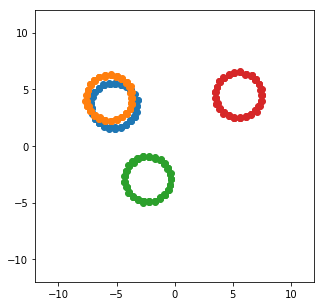

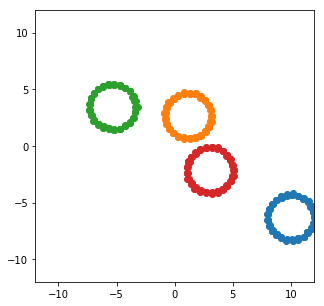

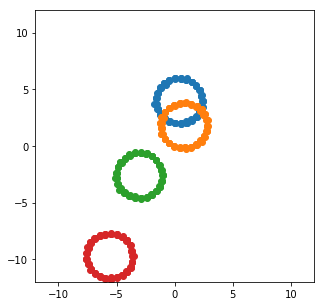

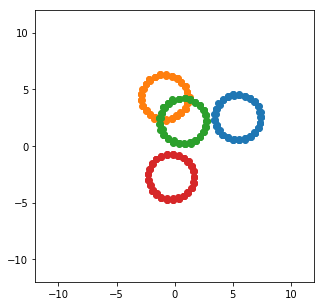

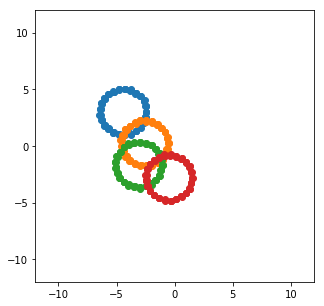

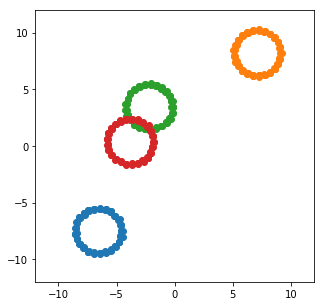

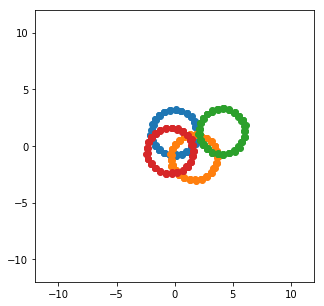

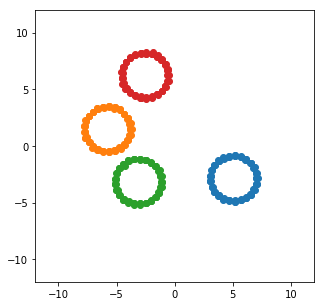

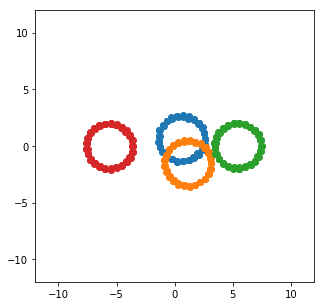

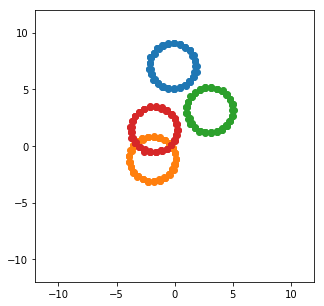

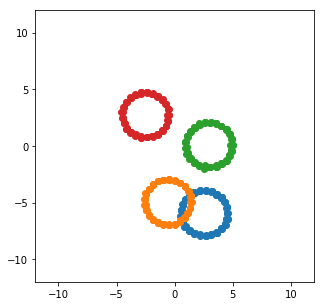

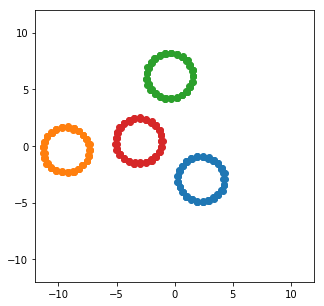

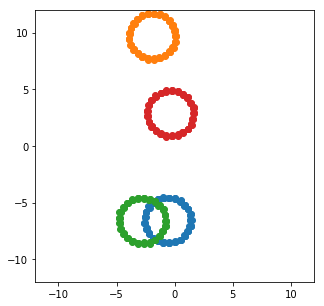

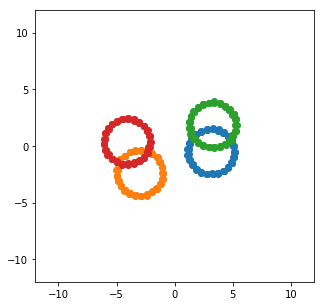

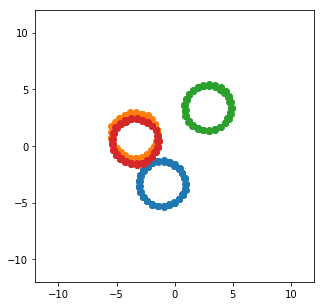

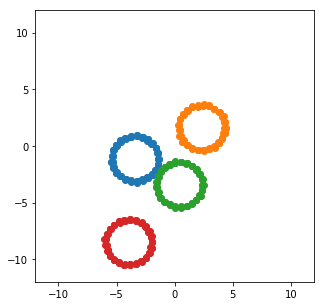

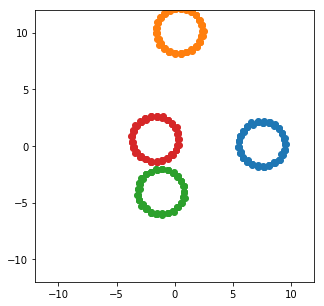

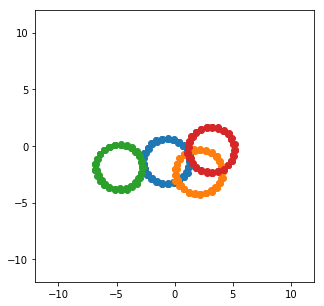

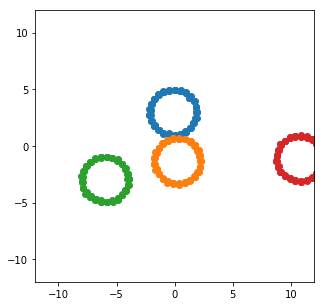

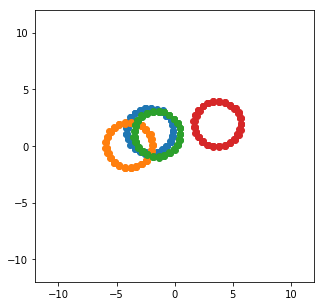

In [20]:
## fixed radius
OBS = np.zeros((num_seqs, N*K, D))
STATES = np.zeros((num_seqs, N*K, K))
OBS_MU = np.zeros((num_seqs, K, D))
for n in range(num_seqs):
    obs, states, obs_mu = rings_fixed_rad(K, bound, N, radius, period, noise_std)
    OBS[n] = obs
    STATES[n] = states
    OBS_MU[n] = obs_mu
    plot_rings(obs, states, K, bound)

In [4]:
path = "../../rings_fixed_radius"
np.save(path + '/obs', OBS)

In [ ]:
# OBS = np.zeros((num_seqs, N*K, D))
# STATES = np.zeros((num_seqs, N*K, K))
# OBS_MU = np.zeros((num_seqs, K, D))
# OBS_RAD = np.zeros((num_seqs, K, 1))
# for n in range(num_seqs):
#     obs, states, obs_mu, obs_rad = rings(K, bound, N, rad_low, rad_high, period, noise_std)
#     OBS[n] = obs
#     STATES[n] = states
#     OBS_MU[n] = obs_mu
#     OBS_RAD[n] = obs_rad
# #     plot_rings(obs, states, K, bound)

In [ ]:
# path = "../../rings_varying_radius"
# np.save(path + '/obs', OBS)
# np.save(path + '/states', STATES)
# np.save(path + '/obs_mu', OBS_MU)
# np.save(path + '/obs_rad', OBS_RAD)